# 팀원명단과 주제
주제: 평일 코로나 확진자수와 주말 영화관람객 수의 상관관계 분석

1. 이나경 (조경지역시스템공학부 2020-12802)
2. 김도연 (경제학부, 2020-19292)
3. 민나영 (자유전공학부, 2019-14957)
4. 박보은 (국어국문학과 2019-18139)
5. 백세은 (기악과, 2018-15202)
6. 성다은 (인문광역, 2020-19423)

# 전체 코드

In [ ]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bol

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name) 
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False 

NanumMyeongjo


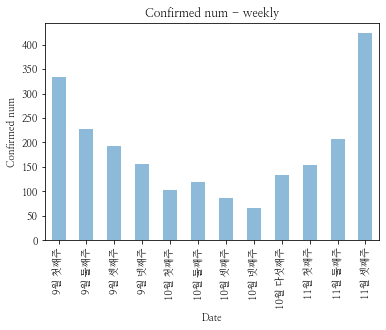

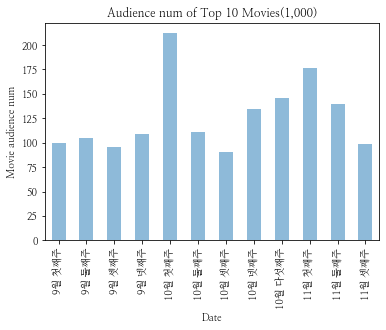

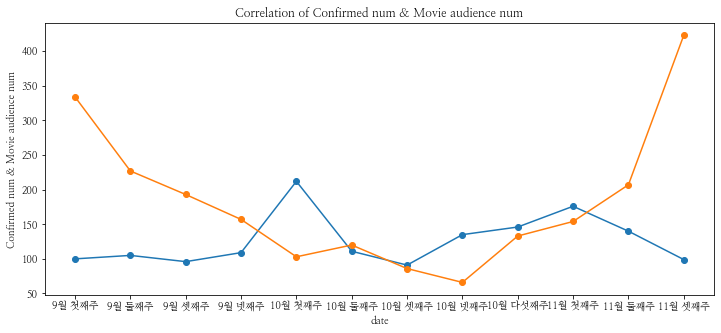

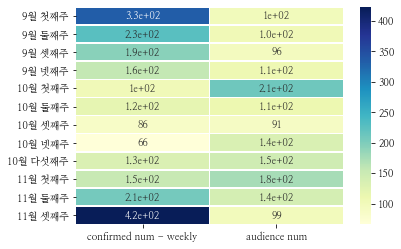

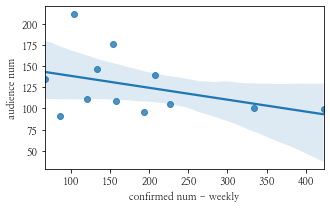

In [ ]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 수집
# 1. 서울시 코로나 확진자수 웹사이트 불러오기
url= 'https://www.seoul.go.kr/coronaV/coronaStatus.do?menu_code=01' 
page=urlopen(url)
soup=BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

# 2. 영화 관람객수 웹사이트 불러오기
url= 'http://www.kobis.or.kr/kobis/business/stat/boxs/findWeeklyBoxOfficeList.do' 
page=urlopen(url)
soup=BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

 
# 확진자 수 9월 첫째주 - 11월 셋째주
confirmed_num ={'총합추가':[334,227,193,157,103,120,86,66,133,154,207,423]}
date=['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']

s=pd.DataFrame(confirmed_num, index=date)
s

# 영화관람객 수 9월 첫째주 - 11월 셋째주
movie_num ={'상위 10개 영화 관람객수':[100,105,96,109,212,111, 91, 135, 146, 176, 140, 99]}  #천 단위로 끊음
date=['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']

s2=pd.DataFrame(movie_num, index=date)
s2

# 비쥬얼라이징
# 막대그래프1 : 확진자 수
s['총합추가'].plot(kind='bar', alpha =0.5)
plt.title('Confirmed num - weekly')
plt.ylabel('Confirmed num')
plt.xlabel('Date')
plt.show()

# 막대그래프2 : 영화 관람객 수 
s2['상위 10개 영화 관람객수'].plot(kind='bar', alpha = 0.5)
plt.title('Audience num of Top 10 Movies(1,000)')
plt.ylabel('Movie audience num')
plt.xlabel('Date')
plt.show()

# 선그래프 2개 겹쳐 그리기
date = ['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']
movie_num =[100,105,96,109,212,111, 91, 135, 146, 176, 140, 99] #천단위 이하로 생략(백의자리에서 반올림한값)
confirmed_num=[334,227,193,157,103,120,86,66,133,154,207,423]

fig = plt.figure(figsize=(12,5))
plt.plot(date, movie_num,marker='o')
plt.plot(date,confirmed_num,marker='o')
plt.title('Correlation of Confirmed num & Movie audience num')
plt.ylabel('Confirmed num & Movie audience num')
plt.xlabel('date')
plt.show()

# 히트맵
num_title = ['confirmed num - weekly','audience num']
num_data = [[334,100],[227,105],[193,96],[157,109],[103,212],[120,111],[86,91],[66,135],[133,146],[154,176],[207,140],[423,99]]
date = ['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']
final=pd.DataFrame(num_data, index=date, columns=num_title)

sns.heatmap(final,annot=True, cmap='YlGnBu', linewidth=0.5)
plt.show()

# 회귀선이 있는 산포도
plt.figure(figsize=(5,3))
sns.regplot(x='confirmed num - weekly', y='audience num',data=final)
plt.show()

# 부분 코드 1 - 데이터 수집 

- 먼저, 필요한 데이터는 ‘주중 확진자 수’와 ‘주말 관람객 수’로, 이들을 구하기 위해 해당 데이터를 구할 수 있는 사이트 주소를 구하고, 그들 주소의 html을 읽어오는 작업을 했습니다. 
- 그러나 저희가 이번 프로젝트에서 ‘주중 확진자 수’데이터는 서울 특별시의 월 화 수 목 확진자 수 총합의 데이터가 필요했지만, 해당 사이트에서는 서울특별시의 일별 누적 확진자 수만 제공하여 필요한 데이터를 직접 수집하여 정리하는 방식을 사용했습니다. 
-또한, 이번 프로젝트에서 필요한 ‘주말 영화 관람객’ 데이터는 서울특별시 금, 토, 일 상영하는 상위 10개의 영화  관람객 수의 총합이 필요했지만, 해당 사이트에서는 서울특별시 일별 영화별 관람객 수만 제공되어 이 역시 필요한 데이터를 직접 수집, 정리하여 나타냈습니다. 

In [ ]:
!apt-get install fonts-nanum*

import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
sys_font

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name) 
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False 

from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 데이터 수집
# 1. 서울시 코로나 확진자수 웹사이트 불러오기
url= 'https://www.seoul.go.kr/coronaV/coronaStatus.do?menu_code=01' 
page=urlopen(url)
soup=BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

# 2. 영화 관람객수 웹사이트 불러오기
url= 'http://www.kobis.or.kr/kobis/business/stat/boxs/findWeeklyBoxOfficeList.do' 
page=urlopen(url)
soup=BeautifulSoup(page, 'html.parser')
#print(soup.prettify())

 
# 확진자 수 9월 4주 - 11월 3주
confirmed_num ={'총합추가':[334,227,193,157,103,120,86,66,133,154,207,423]}
date=['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']

s=pd.DataFrame(confirmed_num, index=date)
s

# 영화관람객 수 9월 4개 주 - 11월 3주
movie_num ={'상위 10개 영화 관람객수':[100,105,96,109,212,111, 91, 135, 146, 176, 140, 99]}  #천 단위로 끊음
date=['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']

s2=pd.DataFrame(movie_num, index=date)
s2



# 부분 코드 2 - visualization

- visualization에서는 주중 확진자 수와 주말 영화 관람객 수에 대해 파악할 수 있도록 각각 막대그래프를 만들었고, 그 값을 함께 비교하여 보기 위해 꺾은 선 그래프를 만들었습니다. 그리고 시각적으로 주중 확진자 수와 주말 영화 관람객 수에 대해 확인하게 위해 히트맵을 작성했습니다.  
- 마지막으로 저희가 구하고자 했던 '주중 확진자 수'에 따른 '주말 관람객 수'의 상관관계를 파악하기 위해 산점도를 그렸고, 둘 사이의 관계를 보여줄 수 있는 회귀선을 나타냈습니다.

In [ ]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# 비쥬얼라이징
# 막대그래프1 : 확진자 수
s['총합추가'].plot(kind='bar', alpha =0.5)
plt.title('Confirmed num - weekly')
plt.ylabel('Confirmed num')
plt.xlabel('Date')
plt.show()

# 막대그래프2 : 영화 관람객 수 
s2['상위 10개 영화 관람객수'].plot(kind='bar', alpha = 0.5)
plt.title('Audience num of Top 10 Movies(1,000)')
plt.ylabel('Movie audience num')
plt.xlabel('Date')
plt.show()

# 선그래프 2개 겹쳐 그리기

date = ['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']
movie_num =[100,105,96,109,212,111, 91, 135, 146, 176, 140, 99] #천단위 이하로 생략(백의자리에서 반올림한값)
confirmed_num=[334,227,193,157,103,120,86,66,133,154,207,423]

fig = plt.figure(figsize=(12,5))
plt.plot(date, movie_num,marker='o')
plt.plot(date,confirmed_num,marker='o')
plt.title('Correlation of Confirmed num & Movie audience num')
plt.ylabel('Confirmed num & Movie audience num')
plt.xlabel('date')
plt.show()

# 히트맵
num_title = ['confirmed num - weekly','audience num']
num_data = [[334,100],[227,105],[193,96],[157,109],[103,212],[120,111],[86,91],[66,135],[133,146],[154,176],[207,140],[423,99]]
date = ['9월 첫째주','9월 둘째주','9월 셋째주','9월 넷째주','10월 첫째주','10월 둘째주','10월 셋째주','10월 넷째주','10월 다섯째주','11월 첫째주','11월 둘째주','11월 셋째주']
final=pd.DataFrame(num_data, index=date, columns=num_title)

sns.heatmap(final,annot=True, cmap='YlGnBu', linewidth=0.5)
plt.show()

# 회귀선이 있는 산포도
plt.figure(figsize=(5,3))
sns.regplot(x='confirmed num - weekly', y='audience num',data=final)
plt.show()